In [1]:
from src.training.model import TransformerClassifier
from src.utils import load_config

import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Load config
env = "prod"
model_type = "BERT"

training_config = load_config(
    file_name="training_config", env=env, folder="../../config"
)

In [6]:
input_model_1 = "../../output_reports/model_1_2/outlier_detection/detected_outliers.parquet"
input_model_2 = "../../output_reports/model_2_2/outlier_detection/detected_outliers.parquet"
input_model_3 = "../../output_reports/model_3_2/outlier_detection/detected_outliers.parquet"

In [7]:
df_1 = pd.read_parquet(input_model_1)
df_2 = pd.read_parquet(input_model_2)
df_3 = pd.read_parquet(input_model_3)

In [10]:
group1 = df_1.groupby("label").size().to_frame("model_1")
group2 = df_2.groupby("label").size().to_frame("model_2")
group3 = df_3.groupby("label").size().to_frame("model_3")

In [17]:
df = pd.concat([group1, group2, group3], axis=1).reset_index(names=["Label"])

In [18]:
df

,Label,model_1,model_2,model_3
0,0,13,10,17
1,1,13,11,9
2,2,64,98,117


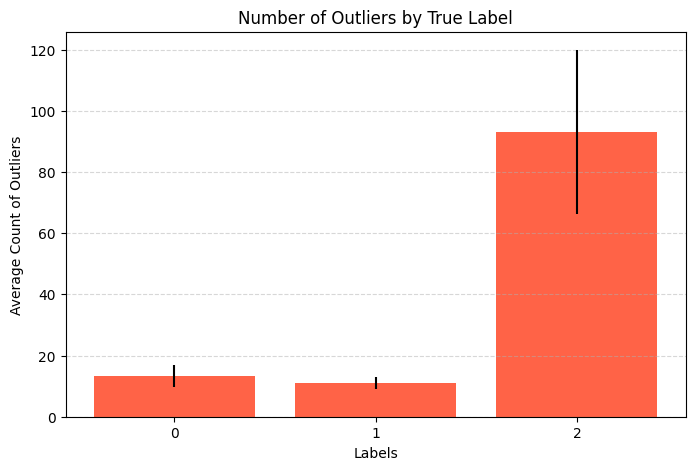

In [27]:
import matplotlib.pyplot as plt

# Calculate mean and standard deviation
df['Mean'] = df[['model_1', 'model_2', 'model_3']].mean(axis=1)
df['StdDev'] = df[['model_1', 'model_2', 'model_3']].std(axis=1)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(df['Label'], df['Mean'], yerr=df['StdDev'], color="tomato")
plt.xticks(df['Label'])
plt.xlabel("Labels")
plt.ylabel("Average Count of Outliers")
plt.title("Number of Outliers by True Label")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# plt.show()
plt.savefig("../../output_reports/temp_outlier_by_class.png")

In [21]:
plt.show()